# AirBnB data EDA: feature correlations

## Notebook set-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Data loading/inspection

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


## 2. Categorical features

### 2.1. Neighborhood group vs room type

#### 2.1.1. Chi-squared test

In [3]:
groups=data_df.groupby(['neighbourhood_group', 'room_type']).size()
chisquared_result=stats.chisquare(list(groups))
print(f'Chi-squared p-value = {chisquared_result.pvalue:.4f}')

Chi-squared p-value = 0.0000


#### 2.1.2. Stratified distribution plot: neighborhood group vs room type

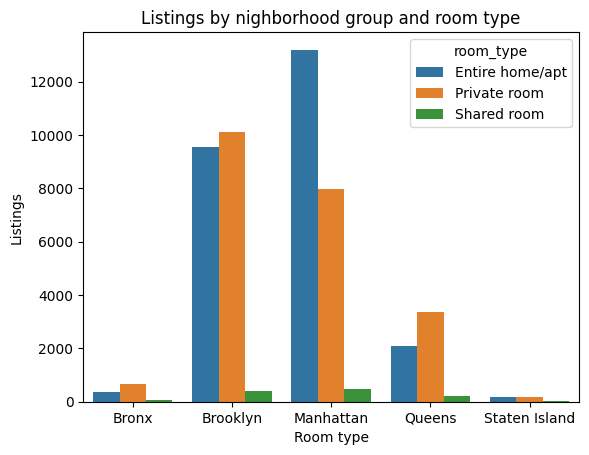

In [4]:
groups=data_df.groupby(['neighbourhood_group', 'room_type']).size()
groups_df=groups.reset_index()
groups_df.rename({0: 'Listings'}, axis=1, inplace=True)

plt.title('Listings by nighborhood group and room type')
sns.barplot(groups_df, x='neighbourhood_group', y='Listings', hue='room_type')
plt.xlabel('Room type')

plt.show()

### 2.2. Neighborhood group & room type vs numerical features

#### 2.2.1. F-test for difference in means

In [5]:
categorical_features=['neighbourhood_group','room_type']
numeric_features=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

ftest_results={
    'Independent var':[],
    'Dependent var':[],
    'p-value':[],
    'F-statistic':[]
}

for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        groups=[list(x) for _, x in data_df.groupby(data_df[categorical_feature])[numeric_feature]]
        result=stats.f_oneway(*groups)

        ftest_results['Independent var'].append(categorical_feature)
        ftest_results['Dependent var'].append(numeric_feature)
        ftest_results['p-value'].append(result.pvalue)
        ftest_results['F-statistic'].append(result.statistic)

ftest_results=pd.DataFrame.from_dict(ftest_results)
ftest_results.head(len(ftest_results))

,Independent var,Dependent var,p-value,F-statistic
0,neighbourhood_group,latitude,0.000000e+00,18664.067852
1,room_type,latitude,3.284034e-01,1.113538
2,neighbourhood_group,longitude,0.000000e+00,16889.473945
3,room_type,longitude,0.000000e+00,937.171228
4,neighbourhood_group,price,7.723724e-302,354.994839
5,room_type,price,0.000000e+00,1716.625795
6,neighbourhood_group,minimum_nights,8.519876e-50,59.022846
7,room_type,minimum_nights,3.832820e-61,139.510668
8,neighbourhood_group,number_of_reviews,1.148527e-28,34.335600
9,room_type,number_of_reviews,1.280375e-08,18.180285


#### 2.2.2. Stratified distribution plots: neighborhood group

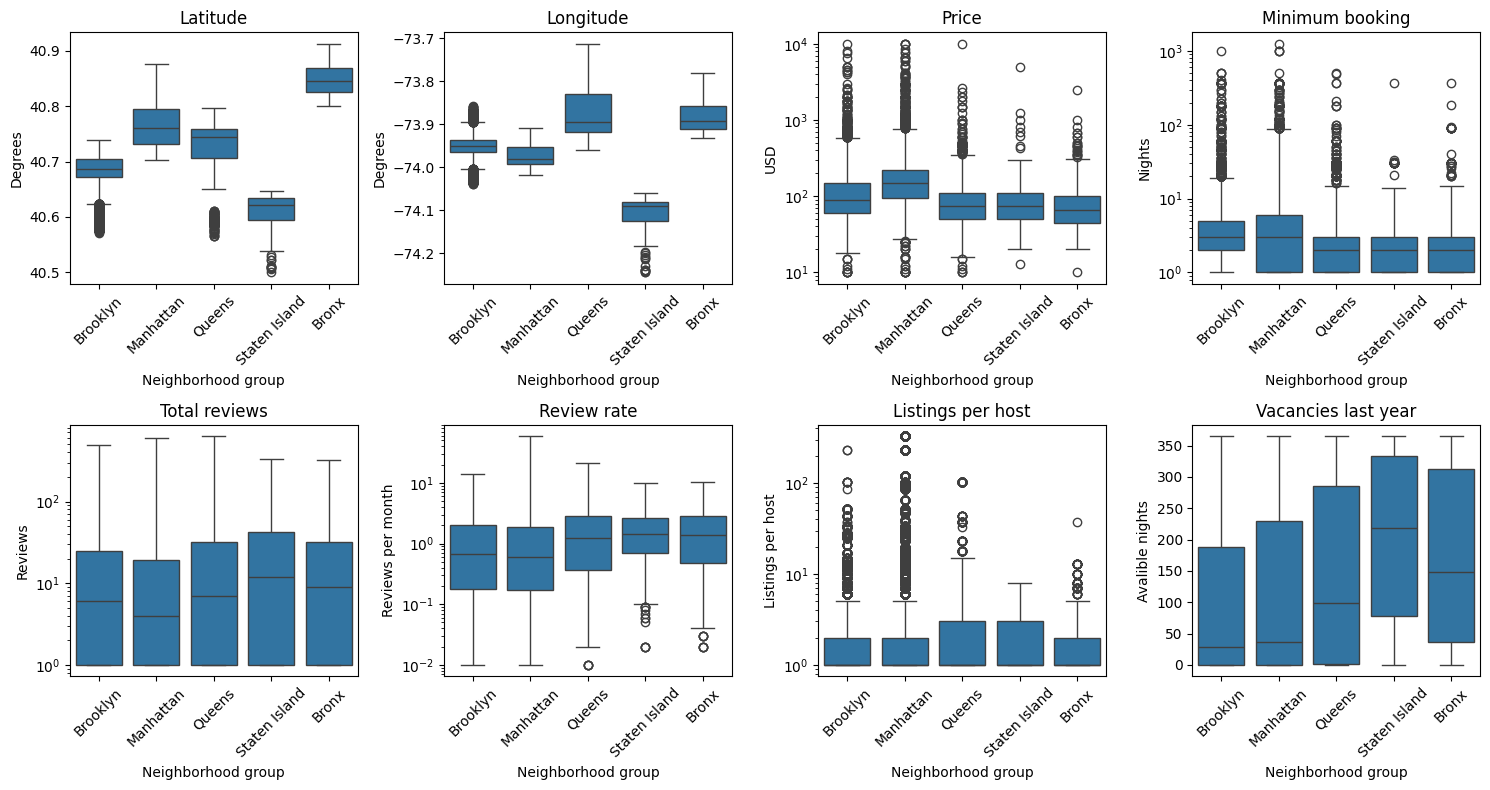

In [6]:
features=['latitude','longitude','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
plot_titles=['Latitude', 'Longitude', 'Price', 'Minimum booking', 'Total reviews', 'Review rate', 'Listings per host', 'Vacancies last year']
ylabels=['Degrees', 'Degrees', 'USD', 'Nights', 'Reviews', 'Reviews per month', 'Listings per host', 'Avalible nights']
log_scales=[False, False, True, True, True, True, True, False]

fig, axs=plt.subplots(2,4, figsize=(15,8))
axs=axs.flatten()

for i, (feature, title, ylabel, log_scale) in enumerate(zip(features, plot_titles, ylabels, log_scales)):
    axs[i].set_title(title)
    sns.boxplot(data_df, x='neighbourhood_group', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_xlabel('Neighborhood group')
    axs[i].set_ylabel(ylabel)

plt.tight_layout()
plt.show()

#### 2.2.3. Stratified distribution plots: room type

/mnt/arkk/4geeks_repos/13-data-preprocessing/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


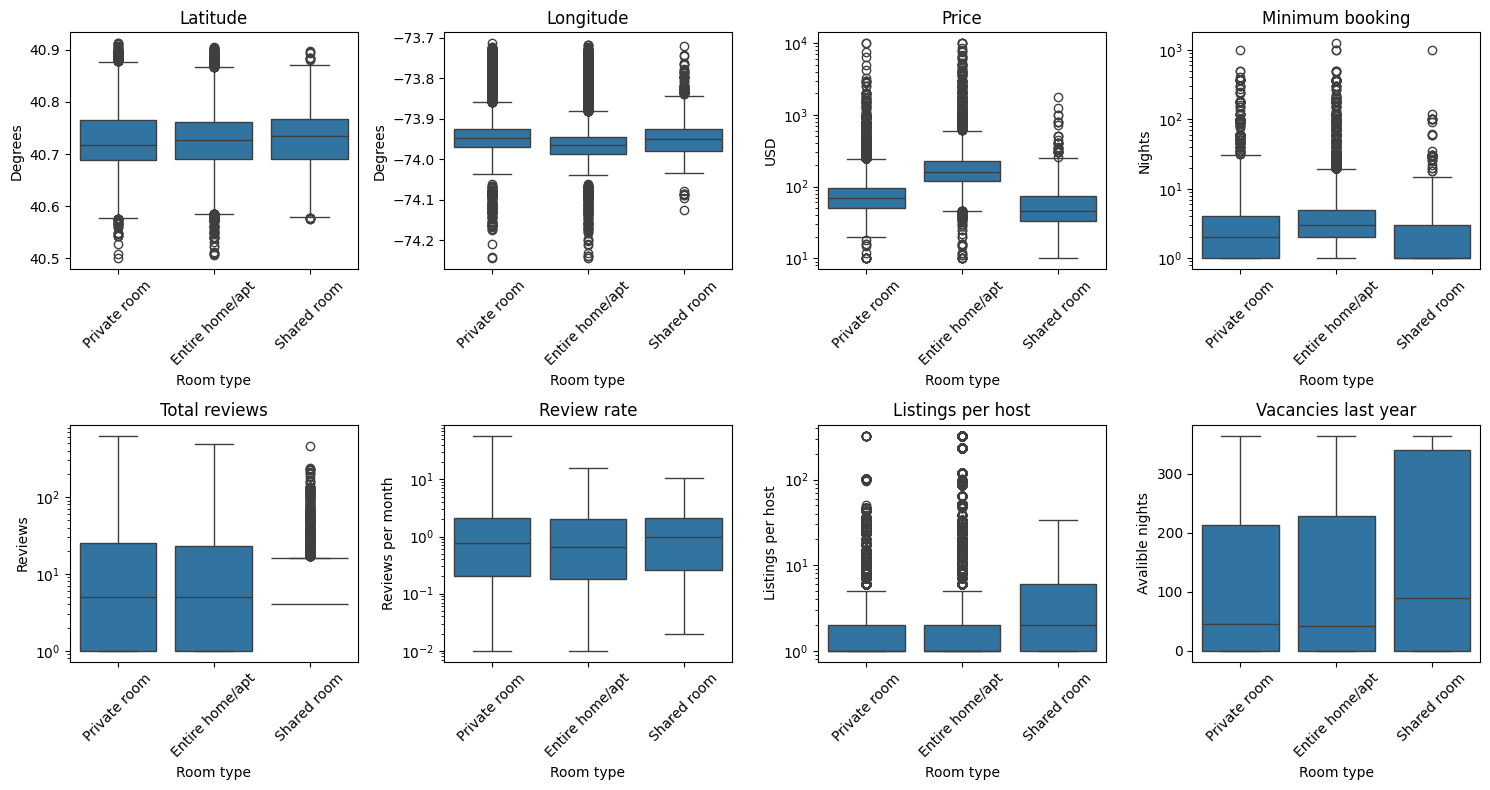

In [7]:
fig, axs=plt.subplots(2,4, figsize=(15,8))
axs=axs.flatten()

for i, (feature, title, ylabel, log_scale) in enumerate(zip(features, plot_titles, ylabels, log_scales)):
    axs[i].set_title(title)
    sns.boxplot(data_df, x='room_type', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_xlabel('Room type')
    axs[i].set_ylabel(ylabel)

plt.tight_layout()
plt.show()

## 3. Numerical features

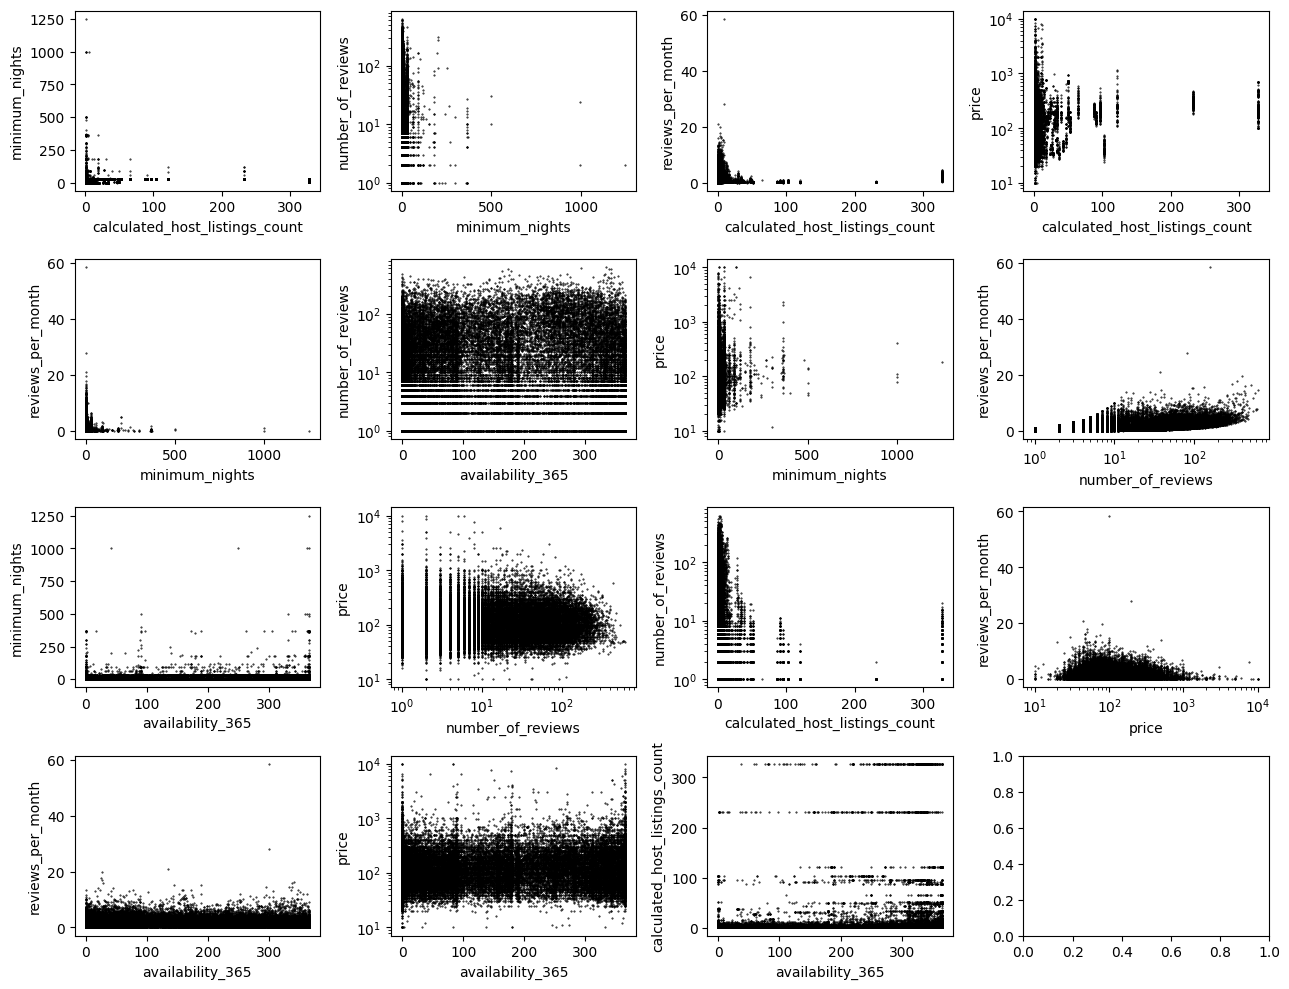

In [9]:
from itertools import product

numeric_features=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
log_features=['price', 'number_of_reviews']
feature_pairs=list(set(tuple(sorted(pair)) for pair in product(numeric_features, numeric_features)))

fig, axs=plt.subplots(4,4, figsize=(13,10))
axs=axs.flatten()

i=0

for feature_pair in feature_pairs:

    if feature_pair[0] != feature_pair[1]:

        axs[i].scatter(data_df[feature_pair[0]], data_df[feature_pair[1]], s=0.2, color='black')
        axs[i].set_xlabel(feature_pair[0])
        axs[i].set_ylabel(feature_pair[1])

        if feature_pair[0] in log_features:
            axs[i].set_xscale('log')
        
        if feature_pair[1] in log_features:
            axs[i].set_yscale('log')

        i+=1

plt.tight_layout()